In [1]:
# Suppress warnings to keep the notebook output clean
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.use('Agg')  # Setting backend to 'Agg' when using full matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # For cases where only plt is imported
%matplotlib inline  

# Set plot aesthetics
sns.set(style='whitegrid')

In [6]:
# Load Data
df = pd.read_csv("digital_diet_mental_health.csv", encoding = 'ascii')

In [8]:
print(df.head())

  user_id  age  gender  daily_screen_time_hours  phone_usage_hours  \
0  user_1   51  Female                      4.8                3.4   
1  user_2   64    Male                      3.9                3.5   
2  user_3   41   Other                     10.5                2.1   
3  user_4   27   Other                      8.8                0.0   
4  user_5   55    Male                      5.9                1.7   

   laptop_usage_hours  tablet_usage_hours  tv_usage_hours  social_media_hours  \
0                 1.3                 1.6             1.6                 4.1   
1                 1.8                 0.9             2.0                 2.7   
2                 2.6                 0.7             2.2                 3.0   
3                 0.0                 0.7             2.5                 3.3   
4                 1.1                 1.5             1.6                 1.1   

   work_related_hours  ...  stress_level  physical_activity_hours_per_week  \
0             

# Cleaning Data

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  sleep_

In [10]:
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

Missing values in each column:
user_id                             0
age                                 0
gender                              0
daily_screen_time_hours             0
phone_usage_hours                   0
laptop_usage_hours                  0
tablet_usage_hours                  0
tv_usage_hours                      0
social_media_hours                  0
work_related_hours                  0
entertainment_hours                 0
gaming_hours                        0
sleep_duration_hours                0
sleep_quality                       0
mood_rating                         0
stress_level                        0
physical_activity_hours_per_week    0
location_type                       0
mental_health_score                 0
uses_wellness_apps                  0
eats_healthy                        0
caffeine_intake_mg_per_day          0
weekly_anxiety_score                0
weekly_depression_score             0
mindfulness_minutes_per_day         0
dtype: int64


In [11]:
if missing_values.sum() > 0:
    df.dropna(inplace=True)
    print('Dropped rows with missing values.')

In [28]:
# Verify data types
print('Data types:')
print(df.dtypes)

Data types:
user_id                              object
age                                   int64
gender                               object
daily_screen_time_hours             float64
phone_usage_hours                   float64
laptop_usage_hours                  float64
tablet_usage_hours                  float64
tv_usage_hours                      float64
social_media_hours                  float64
work_related_hours                  float64
entertainment_hours                 float64
gaming_hours                        float64
sleep_duration_hours                float64
sleep_quality                         int64
mood_rating                           int64
stress_level                          int64
physical_activity_hours_per_week    float64
location_type                        object
mental_health_score                   int64
uses_wellness_apps                    int64
eats_healthy                          int64
caffeine_intake_mg_per_day          float64
weekly_anxiety_score

In [17]:
row_count=len(df)
print ('Number of rows:',row_count)

Number of rows: 2000


In [20]:
df.duplicated().sum()
df.drop_duplicates()


,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,user_1996,58,Female,5.6,4.0,2.5,0.3,1.5,1.1,1.2,...,9,0.0,Urban,62,0,1,164.9,20,17,4.9
1996,user_1997,62,Female,3.9,3.1,1.0,1.5,1.1,2.7,4.1,...,8,2.7,Urban,29,0,0,172.6,15,15,25.5
1997,user_1998,64,Female,7.4,3.0,0.0,1.4,0.9,0.8,2.6,...,4,6.5,Urban,54,1,0,101.3,1,20,9.5
1998,user_1999,19,Male,4.2,4.4,2.3,0.9,1.4,1.7,1.2,...,8,2.6,Urban,28,0,0,123.7,1,11,13.4


# Exploring Data Analysis

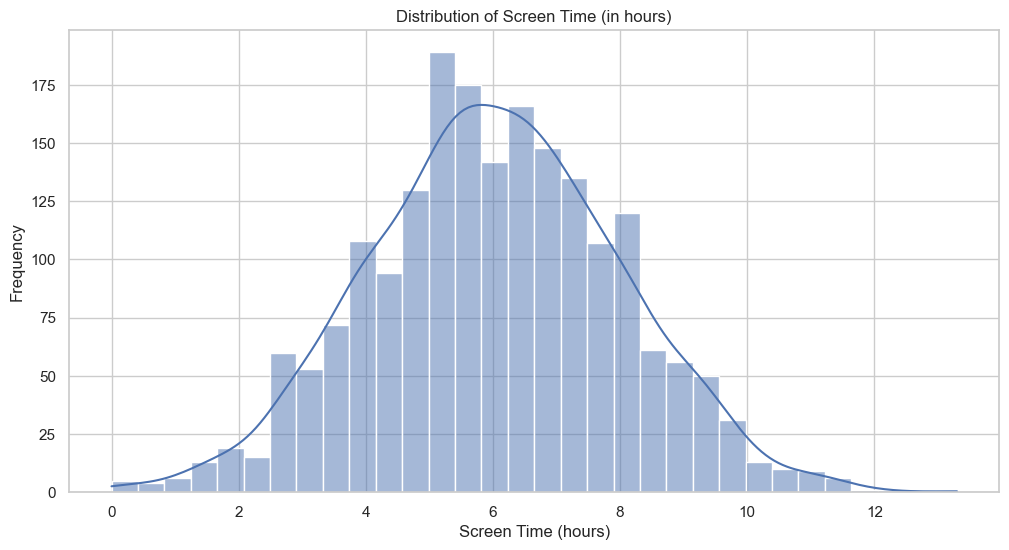

In [14]:
# Exploratory Data Analysis (EDA)

plt.figure(figsize=(12, 6))
sns.histplot(df['daily_screen_time_hours'], kde=True)
plt.title('Distribution of Screen Time (in hours)')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Frequency')
plt.show()

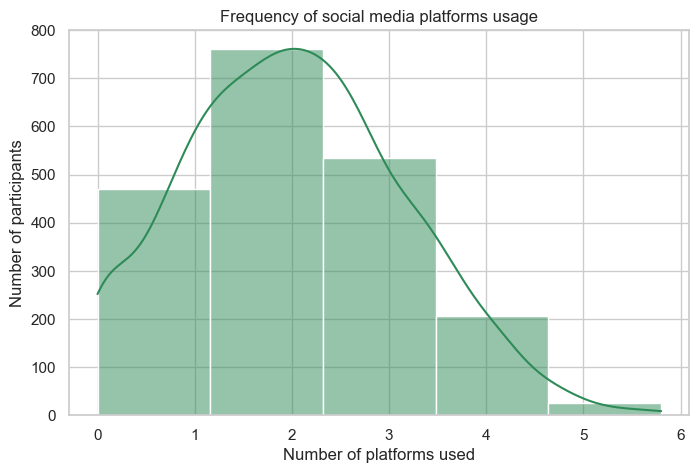

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(df['social_media_hours'],bins=5, kde=True,color='seagreen')
plt.title('Frequency of social media platforms usage')
plt.xlabel('Number of platforms used')
plt.ylabel('Number of participants')
plt.show()

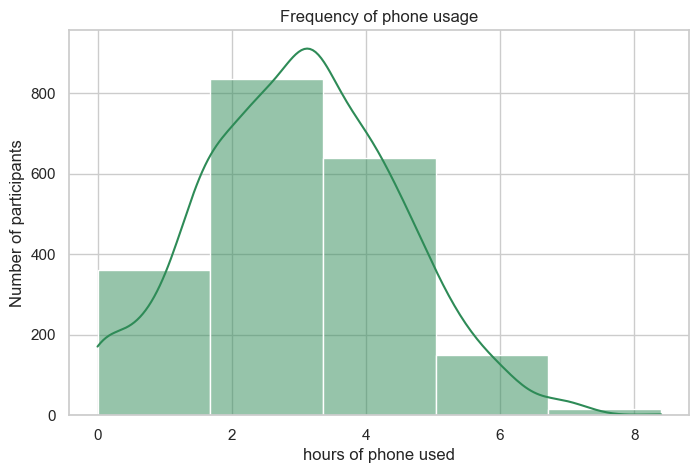

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['phone_usage_hours'],bins=5, kde=True,color='seagreen')
plt.title('Frequency of phone usage')
plt.xlabel('hours of phone used')
plt.ylabel('Number of participants')
plt.show()

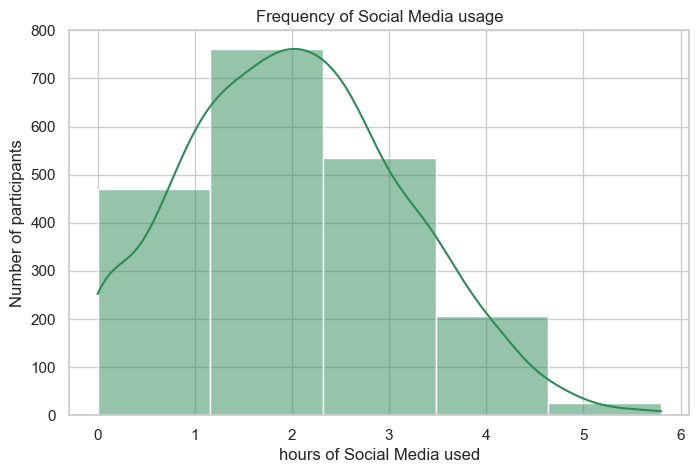

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(df['social_media_hours'],bins=5, kde=True,color='seagreen')
plt.title('Frequency of Social Media usage')
plt.xlabel('hours of Social Media used')
plt.ylabel('Number of participants')
plt.show()

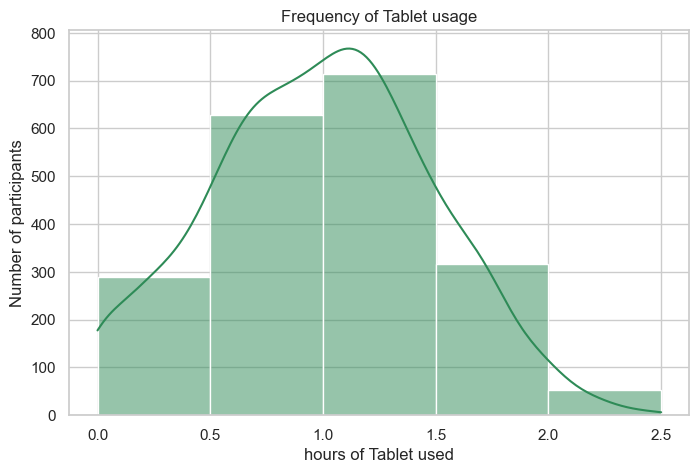

In [26]:
plt.figure(figsize=(8,5))
sns.histplot(df['tablet_usage_hours'],bins=5, kde=True,color='seagreen')
plt.title('Frequency of Tablet usage')
plt.xlabel('hours of Tablet used')
plt.ylabel('Number of participants')
plt.show()

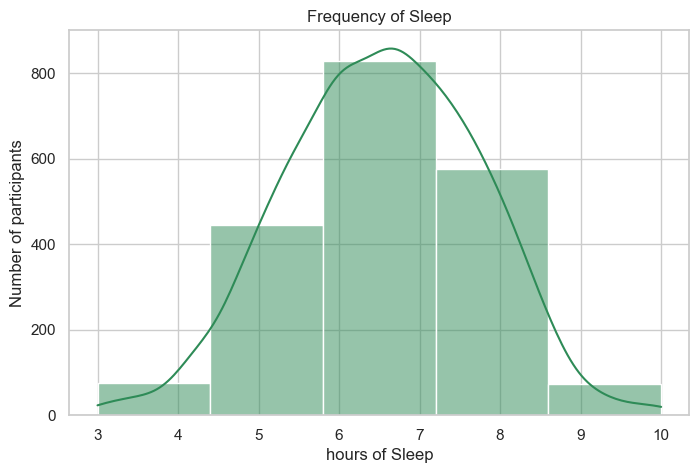

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df['sleep_duration_hours'],bins=5, kde=True,color='seagreen')
plt.title('Frequency of Sleep')
plt.xlabel('hours of Sleep')
plt.ylabel('Number of participants')
plt.show()

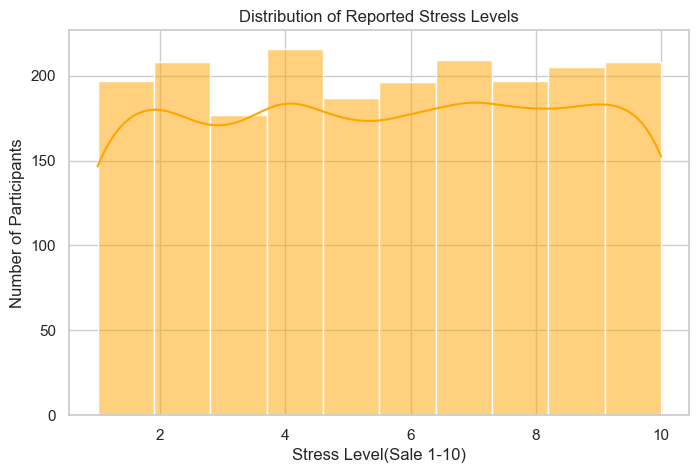

In [29]:
plt.figure(figsize=(8,5))
sns.histplot(df['stress_level'],bins=10, kde=True,color='orange')
plt.title('Distribution of Reported Stress Levels')
plt.xlabel('Stress Level(Sale 1-10)')
plt.ylabel('Number of Participants')
plt.show()

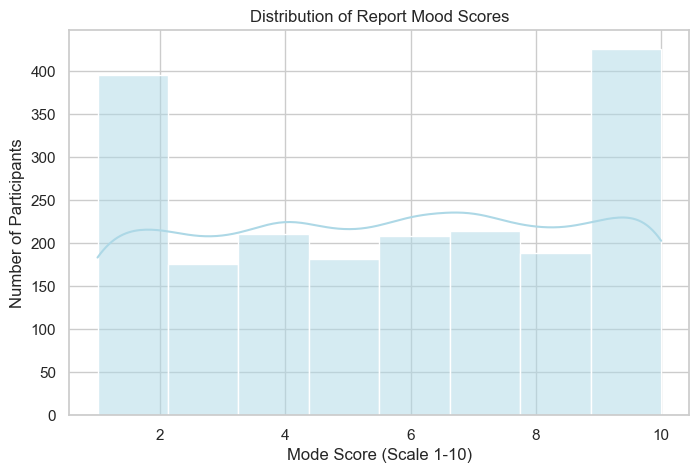

In [30]:
plt.figure(figsize=(8,5))
sns.histplot(df['mood_rating'],bins=8, kde=True,color='lightblue')
plt.title('Distribution of Report Mood Scores')
plt.xlabel('Mode Score (Scale 1-10)')
plt.ylabel('Number of Participants')
plt.show()

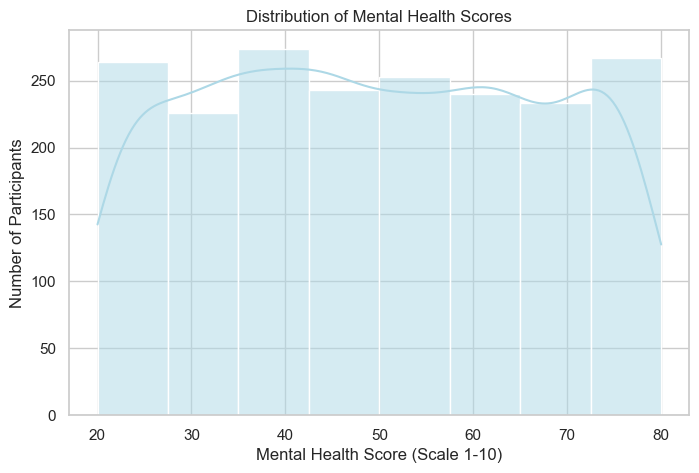

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df['mental_health_score'],bins=8, kde=True,color='lightblue')
plt.title('Distribution of Mental Health Scores')
plt.xlabel('Mental Health Score (Scale 1-10)')
plt.ylabel('Number of Participants')
plt.show()

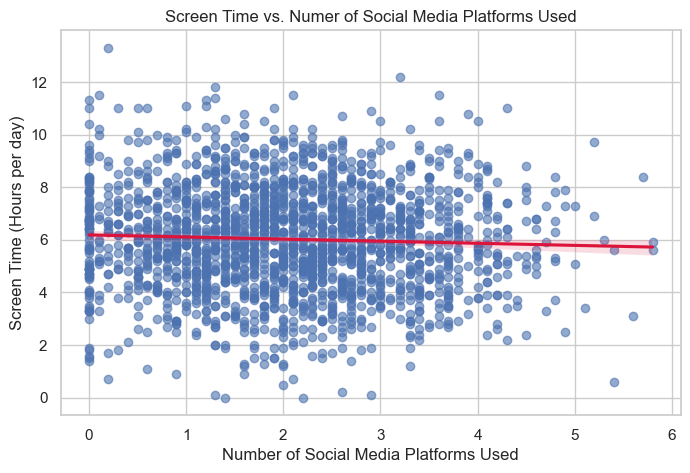

In [32]:
plt.figure(figsize=(8,5))
sns.regplot(x='social_media_hours', y='daily_screen_time_hours',data=df, line_kws={'color':'crimson'},scatter_kws={'alpha':0.6})

plt.title('Screen Time vs. Numer of Social Media Platforms Used')
plt.xlabel('Number of Social Media Platforms Used')
plt.ylabel('Screen Time (Hours per day)')
plt.show()

In [33]:
correlation = df['social_media_hours'].corr(df['daily_screen_time_hours'])
print("Correlation Coefficient:", correlation)

Correlation Coefficient: -0.04564813695777628


In [34]:
df.head()

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,...,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,...,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,...,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,...,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,...,7,3.0,Urban,64,1,1,217.5,8,10,0.0


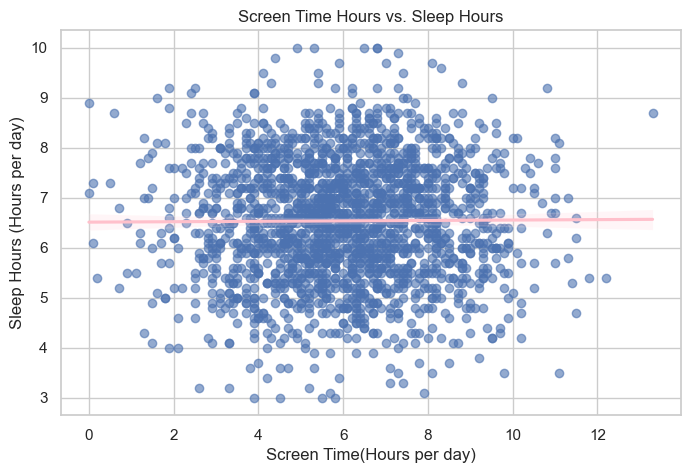

In [38]:
plt.figure(figsize=(8,5))
sns.regplot(x='daily_screen_time_hours', y='sleep_duration_hours',data=df, line_kws={'color':'pink'},scatter_kws={'alpha':0.6})

plt.title('Screen Time Hours vs. Sleep Hours')
plt.xlabel('Screen Time(Hours per day)')
plt.ylabel('Sleep Hours (Hours per day)')
plt.show()

In [39]:
correlation=df['daily_screen_time_hours'].corr(df['sleep_duration_hours'])
print('Correlation Coefficient:',round(correlation,3))

Correlation Coefficient: 0.007


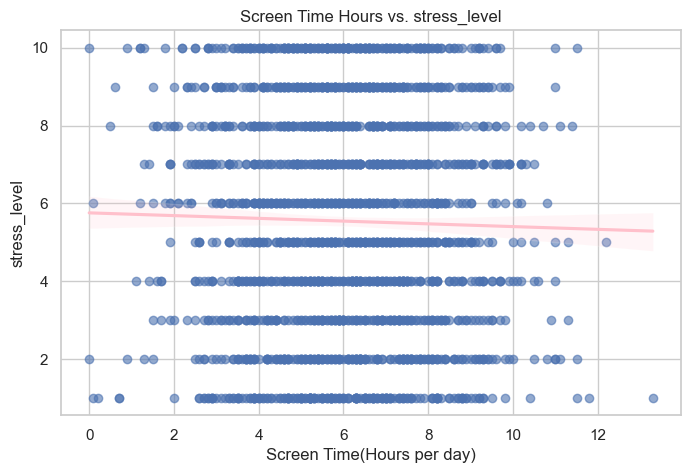

In [40]:
plt.figure(figsize=(8,5))
sns.regplot(x='daily_screen_time_hours', y='stress_level',data=df, line_kws={'color':'pink'},scatter_kws={'alpha':0.6})

plt.title('Screen Time Hours vs. stress_level')
plt.xlabel('Screen Time(Hours per day)')
plt.ylabel('stress_level')
plt.show()

In [41]:
correlation=df['daily_screen_time_hours'].corr(df['stress_level'])
print('Correlation Coefficient:',round(correlation,3))

Correlation Coefficient: -0.024


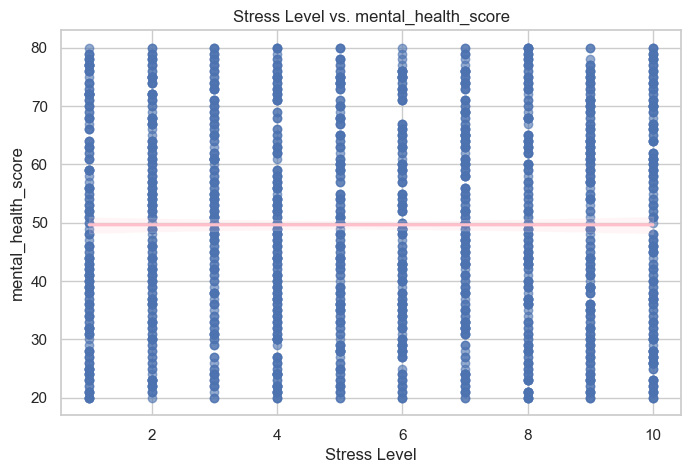

In [42]:
plt.figure(figsize=(8,5))
sns.regplot(x='stress_level', y='mental_health_score',data=df, line_kws={'color':'pink'},scatter_kws={'alpha':0.6})

plt.title('Stress Level vs. mental_health_score')
plt.xlabel('Stress Level')
plt.ylabel('mental_health_score')
plt.show()

In [44]:
correlation=df['stress_level'].corr(df['mental_health_score'])
print('Correlation Coefficient:',round(correlation,3))

Correlation Coefficient: -0.0
